In [13]:
import cv2
import dataset_utils
from PIL import ImageOps, Image
import cv2
import os
import json

In [30]:
img_path = os.path.join(dataset_utils.DS_ROOT_DIR, 'transformed_image', '0001', '0001_0_A_00_00000005.jpg')
test_img = cv2.imread(img_path)
json_path = os.path.join(dataset_utils.DS_ROOT_DIR, 'face_image', '0001', 'face_position_and_landmarks.json')
with open(json_path) as fr:
    lds_json = json.load(fr)
img_lds = lds_json[os.path.basename(img_path)]['lanmarks']

In [31]:
for ld in img_lds:
    cv2.circle(test_img, (ld[0], ld[1]), 3, (0, 0, 255), 1)

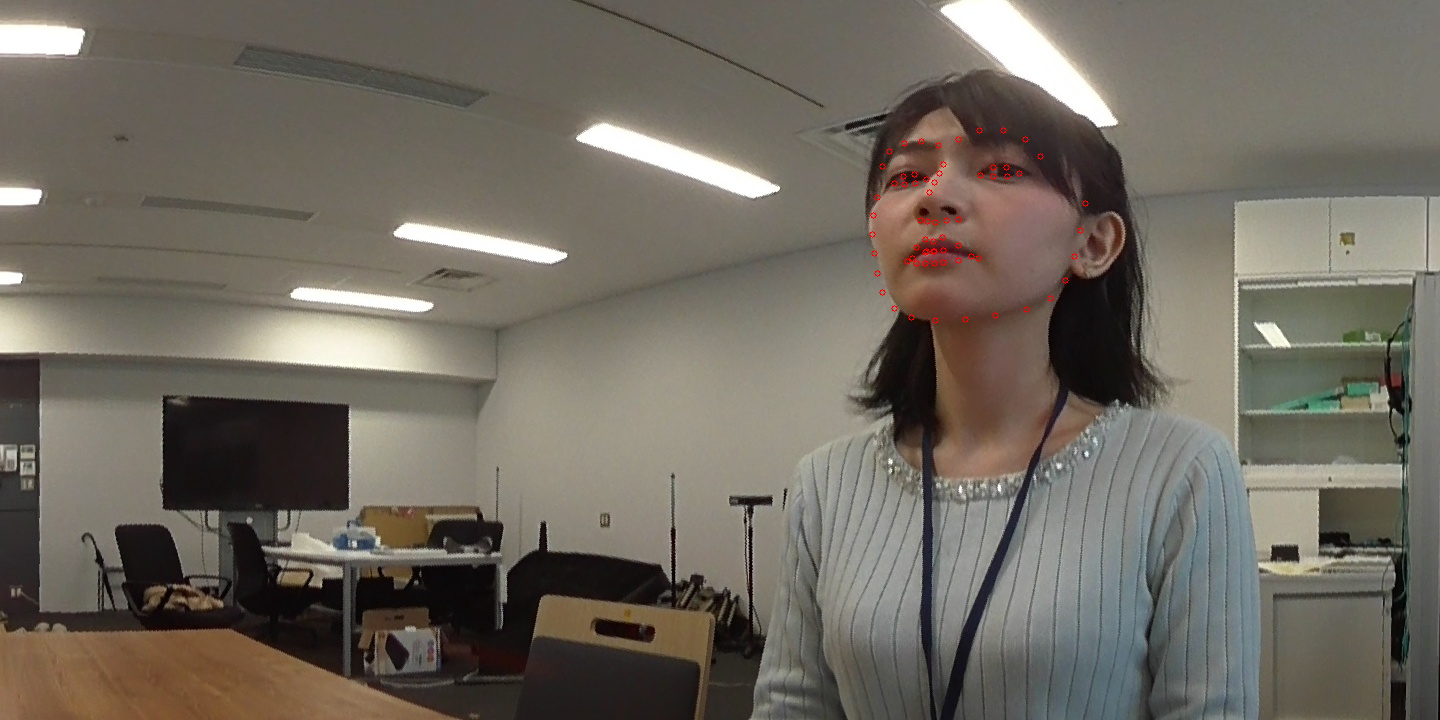

In [32]:
dataset_utils.imshow(test_img)